# Word Association Data Visualization

**Name: Jennifer Lin**

Visually mapping word correlations.

In [7]:
ptexts = [open('ps2data/p{}.txt'.format(i)).read() for i in range(30)]
stexts=[open('ps2data/s{}.txt'.format(i)).read() for i in range(30)]
btexts=[open('ps2data/b{}.txt'.format(i)).read() for i in range(30)]
ttexts=[open('ps2data/t{}.txt'.format(i)).read() for i in range(30)]

In [8]:
from collections import Counter, defaultdict
import re
import numpy as np
p_word = np.sum([Counter(re.findall("([a-z0-9']+)",txt.lower())) for txt in ptexts])
s_word = np.sum([Counter(re.findall("([a-z0-9']+)",txt.lower())) for txt in stexts])
b_word = np.sum([Counter(re.findall("([a-z0-9']+)",txt.lower())) for txt in btexts])
t_word = np.sum([Counter(re.findall("([a-z0-9']+)",txt.lower())) for txt in ttexts])

#word count for all the words that appear in all 120 texts
thewords = p_word + s_word + b_word + t_word

#total number of words in all 120 texts
totalwords = []
for word in thewords:
    count = thewords[word]
    totalwords.append(count)
allwordcount = np.sum(totalwords)

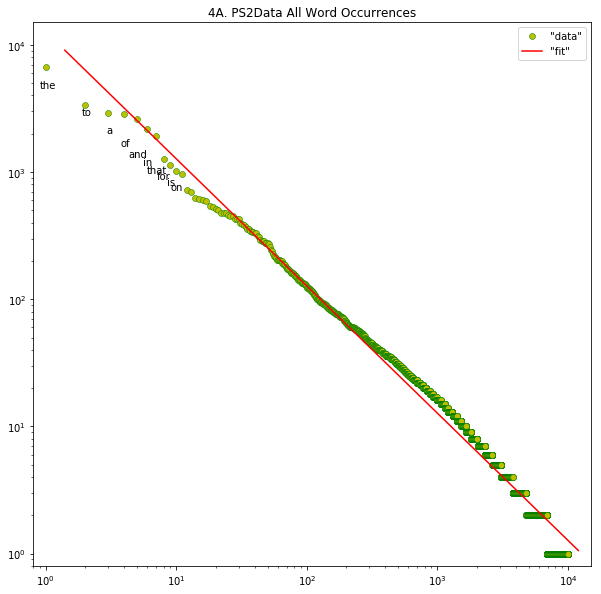

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

top10thousand = thewords.most_common(10000)

#top 10,000 words
x = [i for i in range(1,10001)]

#word count for top 10,000 words
y = []
for word in top10thousand:
    count = word[1]
    y.append(count)

#logarithmic graph of the "rank-frequency" of all words
plt.figure(figsize=(10,10))
plt.loglog(x, y, 'yo',markeredgecolor="g", markeredgewidth=0.5);
plt.title("4A. PS2Data All Word Occurrences", fontsize=12);
plt.xlim(.8,1.5e4)
plt.ylim(.8,1.5e4)

m=12700
r=1.4+np.arange(12000)
plt.loglog(r,m/r,'r-');

top10 = [i[0] for i in thewords.most_common(10)]

for x,y,z in zip(r,m/r,top10):
    plt.text(x-0.35,y**0.925,z,ha='center', fontsize=10)
plt.legend(['"data"','"fit"']);

In [10]:
#total number of words in all 120 texts
allwords = sum(thewords.values())

In [18]:
#politics + sports + technology + business
names = ['Trump', 'Democrats', 'Senate', 'Congress','Republicans',  'Ryan', 'GOP', 'McConnell', 'Graham',  
         'Russia', 'DACA', 'Committee', 'Capitol', 'Schumer', 'Pelosi', 'Clinton', 'Obama'] +\
        ['NFL', 'NBA', 'USA', 'Patriots', 'Philadelphia', 'ESPN', 'Kaepernick', 'Houston', 
         'Florida', 'Dallas', 'Boston', 'Kraft', 'Oakland', 'Warriors' , 'Football'] +\
        ['Apple', 'Facebook', 'Google', 'Twitter'] + ['CEO', 'Amazon', 'Tax', 'Bloomberg']

#lower case of all the items in names
lnames = []
for w in names:
    l = w.lower()
    lnames.append(l)

In [19]:
from collections import Counter
import re
n_p = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in ptexts])
n_s = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in stexts])
n_b = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in btexts])
n_t = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in ttexts])

p_word = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in ptexts])
s_word = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in stexts])
b_word = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in btexts])
t_word = np.sum([Counter(set(re.findall("([a-z']+)",txt.lower()))) for txt in ttexts])

#word count for all the words that appear in all 120 texts
thewords = p_word + s_word + b_word + t_word

#word and their counts for all the words that appear in all 120 texts
total = n_p + n_s + n_b + n_t

In [20]:
#list of all co-occurrences
co=defaultdict(int)

#combines all 4 article sets 
allDocs = ptexts+stexts+btexts+ttexts
    
for txt in allDocs:
    #searches unique co-occurrences per document
    words = set(re.findall("[a-z']+", txt.lower()))
    for w0 in words:
        for w1 in words:
            #gets rid of duplicate pairs of all possible co-occurrences with the inequality
            if w0 < w1: co[(w0,w1)] +=1

In [21]:
#finds all 40x40 co-pairs in the names list
for x in lnames:
    prob0 = thewords[x]/120
    for y in lnames:
        prob1 = thewords[y]/120
        coprob = co[(x,y)]/120
        if(coprob == prob0*prob1):
            print(x + " , " + y + ": P(A,B)= "+ str(coprob) + " P(A)= " + str(prob0) + " P(B)= " +str(prob1))

congress , usa: P(A,B)= 0.016666666666666666 P(A)= 0.2 P(B)= 0.08333333333333333
congress , florida: P(A,B)= 0.016666666666666666 P(A)= 0.2 P(B)= 0.08333333333333333
committee , nba: P(A,B)= 0.008333333333333333 P(A)= 0.125 P(B)= 0.06666666666666667
committee , football: P(A,B)= 0.016666666666666666 P(A)= 0.125 P(B)= 0.13333333333333333
dallas , tax: P(A,B)= 0.008333333333333333 P(A)= 0.06666666666666667 P(B)= 0.125
boston , gop: P(A,B)= 0.008333333333333333 P(A)= 0.06666666666666667 P(B)= 0.125
facebook , florida: P(A,B)= 0.008333333333333333 P(A)= 0.1 P(B)= 0.08333333333333333


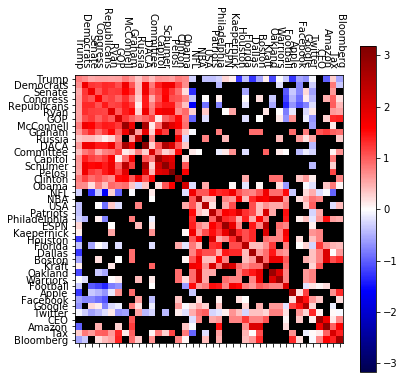

In [22]:
#list of all co-occurrences
co=defaultdict(int)

#combines all 4 article sets 
allDocs = ptexts+stexts+btexts+ttexts
    
for txt in allDocs:
    #searches unique co-occurrences per document
    words = set(re.findall("[a-z']+", txt.lower()))
    for w0 in words:
        for w1 in words:
            co[(w0,w1)] +=1

#2D array with logarithmic values to create 40x40 matrix table
C=np.zeros((len(lnames),len(lnames)))
acc1 = 0
for x in lnames:
    acc = 0
    prob0 = thewords[x]/120
    for y in lnames:
        prob1 = thewords[y]/120
        coprob = co[(x,y)]/120
        #can't take log of 0, so set co-occurrence probability to infinity
        if(coprob==0):
            C[acc,acc1] = (-np.inf)
        else:
            C[acc,acc1] = (np.log(coprob/(prob0*prob1)))
        acc += 1
    acc1 +=1

plt.figure(figsize = (6,6));
plt.cm.seismic.set_bad('k')  # renders -np.inf as black
plt.imshow(C,interpolation='none',cmap='seismic',vmin=-np.max(C))
plt.colorbar() #add colorbar at right
plt.gca().tick_params(labelbottom='off',labeltop='on') #label columns at top
plt.xticks(range(len(names)),names,rotation=270);
plt.yticks(range(len(names)),names);

#### The red hues denote positive correlations, white denotes independent relationship, while blue hues denote negative correlations.